# Dataset importin

In [1]:
import kagglehub
import pandas as pd
import os

# دانلود دیتاست
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

# پیدا کردن فایل CSV (ممکنه اسمش فرق کنه)
for file in os.listdir(path):
    if file.endswith('.csv'):
        csv_path = os.path.join(path, file)
        break

# خواندن دیتا
df = pd.read_csv(csv_path)
print(f"دیتاست بارگزاری شد! شکل: {df.shape}")

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
دیتاست بارگزاری شد! شکل: (7043, 21)


# info

In [2]:
# 1. نمایش اطلاعات اولیه دیتافریم
print("=== اطلاعات اولیه دیتاست ===")
print(df.info())

# 2. نمایش ۵ ردیف اول
print("\n=== ۵ ردیف اول داده‌ها ===")
print(df.head())

# 3. بررسی مقادیر NaN
print("\n=== مقادیر NaN در هر ستون ===")
print(df.isnull().sum())

# 4. بررسی انواع داده‌ها
print("\n=== انواع داده‌ها (Dtypes) ===")
print(df.dtypes.value_counts())

=== اطلاعات اولیه دیتاست ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBill

# Data processing

In [3]:
# 1. بررسی مشکل TotalCharges (ستون عددی که string است)
print("=== بررسی ستون TotalCharges ===")
print("نمونه مقادیر TotalCharges:")
print(df['TotalCharges'].head(10))

# 2. تبدیل TotalCharges به عددی و پیدا کردن خطاها
print("\n=== تبدیل TotalCharges به عدد ===")
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. بررسی مقادیر NaN ایجاد شده
print(f"\nتعداد مقادیر NaN در TotalCharges: {df['TotalCharges'].isnull().sum()}")

# 4. بررسی ردیف‌هایی که TotalCharges در آنها NaN شده
print("\n=== نمونه‌ای از ردیف‌های مشکل‌دار ===")
nan_totalcharges = df[df['TotalCharges'].isnull()]
print(f"تعداد ردیف‌های مشکل‌دار: {len(nan_totalcharges)}")
if len(nan_totalcharges) > 0:
    print("نمونه‌ای از این ردیف‌ها:")
    print(nan_totalcharges[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

# 5. بررسی منطق داده‌ها برای تصمیم‌گیری
print("\n=== تحلیل مقادیر problem ===")
print("آیا ردیف‌های مشکل‌دار tenure=0 دارند؟")
print(f"Tenure=0 در ردیف‌های مشکل‌دار: {(nan_totalcharges['tenure'] == 0).all()}")
print(f"Tenure=0 در کل دیتاست: {(df['tenure'] == 0).sum()} ردیف")

# 6. تصمیم‌گیری و پر کردن مقادیر خالی
print("\n=== تصمیم‌گیری برای مقادیر NaN ===")
# منطق: اگر tenure=0 باشد، TotalCharges باید 0 باشد
df['TotalCharges'] = df['TotalCharges'].fillna(0)

print(f"تعداد NaN پس از پر کردن: {df['TotalCharges'].isnull().sum()}")
print(f"\nاطلاعات TotalCharges پس از پاکسازی:")
print(f"  نوع داده: {df['TotalCharges'].dtype}")
print(f"  محدوده مقادیر: {df['TotalCharges'].min():.2f} تا {df['TotalCharges'].max():.2f}")

# 7. بررسی انواع داده‌ها پس از پاکسازی
print("\n=== بررسی انواع داده‌ها پس از پاکسازی ===")
print(df.dtypes.value_counts())

=== بررسی ستون TotalCharges ===
نمونه مقادیر TotalCharges:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

=== تبدیل TotalCharges به عدد ===

تعداد مقادیر NaN در TotalCharges: 11

=== نمونه‌ای از ردیف‌های مشکل‌دار ===
تعداد ردیف‌های مشکل‌دار: 11
نمونه‌ای از این ردیف‌ها:
      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN

=== تحلیل مقادیر problem ===
آیا ردیف‌های مشکل‌دار tenure=0 دارند؟
Tenure=0 در ردیف‌های مشکل‌دار: True
Tenure=0 در کل دیتاست: 11 ردیف

=== تصمیم‌گیری برای مقادیر NaN ===
تعداد NaN پس از پر کردن: 0

اطلاعات TotalCharges پس از پاکسازی:
  نوع داده: float64
  محدوده مقادیر: 0.00 تا 8684.80

=== بررسی انواع داده‌ها پس از پاکسازی ===
object     17
int64    

In [4]:
# 1. حذف ستون customerID (شناسه مشتری برای مدل‌سازی مناسب نیست)
print("=== حذف ستون شناسه مشتری ===")
df = df.drop('customerID', axis=1)
print(f"شکل دیتافریم پس از حذف customerID: {df.shape}")

# 2. تبدیل ستون هدف (Churn) به عددی
print("\n=== تبدیل ستون Churn به عددی ===")
print("مقادیر منحصر به فرد در Churn قبل از تبدیل:", df['Churn'].unique())

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("مقادیر منحصر به فرد در Churn بعد از تبدیل:", df['Churn'].unique())

# بررسی توزیع کلاس‌ها
print("\n=== توزیع کلاس Churn ===")
churn_distribution = df['Churn'].value_counts()
print(churn_distribution)
print(f"نرخ Churn: {df['Churn'].mean():.2%}")

# 3. شناسایی ستون‌های categorical
print("\n=== شناسایی ستون‌های Categorical ===")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"تعداد ستون‌های categorical: {len(categorical_cols)}")
print("لیست ستون‌های categorical:", categorical_cols)

# 4. بررسی مقادیر منحصر به فرد در هر ستون categorical
print("\n=== مقادیر منحصر به فرد در ستون‌های Categorical ===")
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"{col} ({len(unique_vals)} مقدار): {unique_vals[:10]}" if len(unique_vals) > 10
          else f"{col} ({len(unique_vals)} مقدار): {unique_vals}")

# 5. تبدیل ستون‌های باینری (Yes/No) به 0 و 1
print("\n=== تبدیل ستون‌های باینری ===")

# شناسایی ستون‌هایی که فقط Yes/No دارند
binary_cols = []
for col in categorical_cols:
    unique_vals = set(df[col].unique())
    if unique_vals.issubset({'Yes', 'No'}):
        binary_cols.append(col)

print(f"ستون‌های باینری (Yes/No): {binary_cols}")

# تبدیل Yes به 1 و No به 0
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
    print(f"{col}: تبدیل شد")

# 6. بررسی ستون MultipleLines (دارای ۳ مقدار)
print("\n=== بررسی ستون MultipleLines ===")
print("مقادیر منحصر به فرد در MultipleLines:", df['MultipleLines'].unique())

# تبدیل MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({
    'Yes': 1,
    'No': 0,
    'No phone service': 0  # اگر تلفن ندارند، پس خطوط چندگانه هم ندارند
})
print("پس از تبدیل MultipleLines:", df['MultipleLines'].unique())

# 7. تبدیل جنسیت
print("\n=== تبدیل ستون gender ===")
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
print("مقادیر gender پس از تبدیل:", df['gender'].unique())

# 8. بررسی انواع داده‌های فعلی
print("\n=== بررسی نهایی انواع داده‌ها ===")
print(df.dtypes.value_counts())
print(f"\nشکل نهایی دیتافریم: {df.shape}")

=== حذف ستون شناسه مشتری ===
شکل دیتافریم پس از حذف customerID: (7043, 20)

=== تبدیل ستون Churn به عددی ===
مقادیر منحصر به فرد در Churn قبل از تبدیل: ['No' 'Yes']
مقادیر منحصر به فرد در Churn بعد از تبدیل: [0 1]

=== توزیع کلاس Churn ===
Churn
0    5174
1    1869
Name: count, dtype: int64
نرخ Churn: 26.54%

=== شناسایی ستون‌های Categorical ===
تعداد ستون‌های categorical: 15
لیست ستون‌های categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

=== مقادیر منحصر به فرد در ستون‌های Categorical ===
gender (2 مقدار): ['Female' 'Male']
Partner (2 مقدار): ['Yes' 'No']
Dependents (2 مقدار): ['No' 'Yes']
PhoneService (2 مقدار): ['No' 'Yes']
MultipleLines (3 مقدار): ['No phone service' 'No' 'Yes']
InternetService (3 مقدار): ['DSL' 'Fiber optic' 'No']
OnlineSecurity (3 مقدار): ['No' 'Yes' 'No internet

In [5]:
# 1. بررسی ستون‌های باقی‌مانده از نوع object
print("=== ستون‌های object باقی‌مانده ===")
remaining_object_cols = df.select_dtypes(include=['object']).columns.tolist()
print(remaining_object_cols)

# 2. بررسی ستون‌های سرویس اینترنت (دارای 'No internet service')
print("\n=== پردازش ستون‌های سرویس اینترنت ===")
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies']

print("تحلیل: ستون‌های فوق سه مقدار دارند: 'Yes', 'No', 'No internet service'")
print("تصمیم: 'No internet service' را با 'No' یکسان در نظر می‌گیریم (هر دو = 0)")

for col in internet_service_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0})
    print(f"{col}: تبدیل شد - مقادیر منحصر به فرد: {df[col].unique()}")

# 3. بررسی ستون InternetService
print("\n=== پردازش ستون InternetService ===")
print("مقادیر منحصر به فرد در InternetService:", df['InternetService'].unique())

# تبدیل InternetService به one-hot encoding
print("\n=== One-Hot Encoding برای ستون‌های باقی‌مانده ===")

# ستون‌هایی که نیاز به one-hot encoding دارند
cols_to_encode = ['InternetService', 'Contract', 'PaymentMethod']

print(f"ستون‌هایی که one-hot می‌شوند: {cols_to_encode}")

# انجام one-hot encoding
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

print(f"شکل دیتافریم قبل از encoding: {df.shape}")
print(f"شکل دیتافریم بعد از encoding: {df_encoded.shape}")

# 4. بررسی ستون‌های جدید ایجاد شده
print("\n=== ستون‌های جدید ایجاد شده ===")
new_columns = [col for col in df_encoded.columns if col not in df.columns]
print(f"تعداد ستون‌های جدید: {len(new_columns)}")
print("نمونه‌ای از ستون‌های جدید:")
print(new_columns[:10])

# 5. به‌روزرسانی df
df = df_encoded

# 6. بررسی نهایی انواع داده‌ها
print("\n=== بررسی نهایی انواع داده‌ها ===")
print(df.dtypes.value_counts())

# 7. بررسی shape نهایی
print(f"\n=== شکل نهایی دیتافریم ===")
print(f"تعداد ردیف‌ها: {df.shape[0]}")
print(f"تعداد ستون‌ها: {df.shape[1]}")
print(f"لیست ستون‌ها:")
for i, col in enumerate(df.columns.tolist(), 1):
    print(f"{i:2}. {col}")

=== ستون‌های object باقی‌مانده ===
['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

=== پردازش ستون‌های سرویس اینترنت ===
تحلیل: ستون‌های فوق سه مقدار دارند: 'Yes', 'No', 'No internet service'
تصمیم: 'No internet service' را با 'No' یکسان در نظر می‌گیریم (هر دو = 0)
OnlineSecurity: تبدیل شد - مقادیر منحصر به فرد: [0 1]
OnlineBackup: تبدیل شد - مقادیر منحصر به فرد: [1 0]
DeviceProtection: تبدیل شد - مقادیر منحصر به فرد: [0 1]
TechSupport: تبدیل شد - مقادیر منحصر به فرد: [0 1]
StreamingTV: تبدیل شد - مقادیر منحصر به فرد: [0 1]
StreamingMovies: تبدیل شد - مقادیر منحصر به فرد: [0 1]

=== پردازش ستون InternetService ===
مقادیر منحصر به فرد در InternetService: ['DSL' 'Fiber optic' 'No']

=== One-Hot Encoding برای ستون‌های باقی‌مانده ===
ستون‌هایی که one-hot می‌شوند: ['InternetService', 'Contract', 'PaymentMethod']
شکل دیتافریم قبل از encoding: (7043, 20)
شکل دیتافریم بعد از encoding: (7043

# Get final info

=== Overall Churn Distribution ===


/tmp/ipython-input-2644253491.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette='Set2')


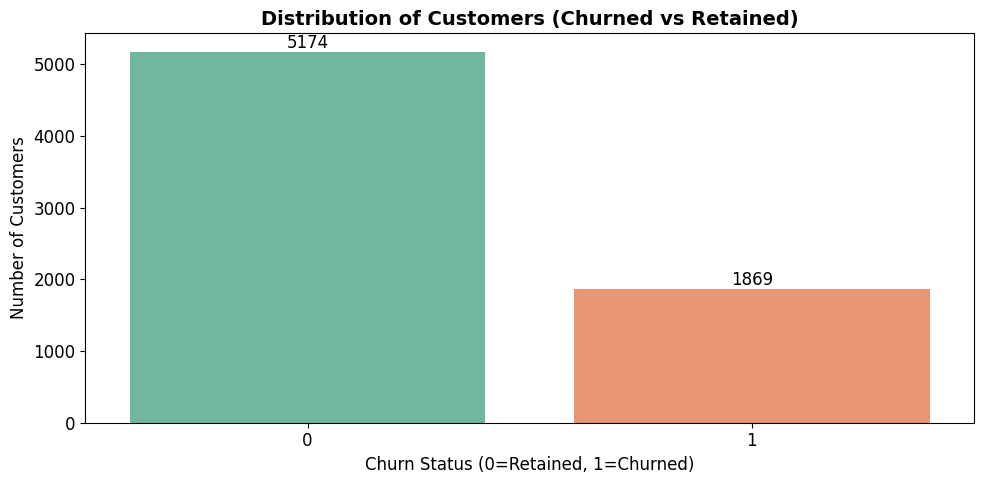

Retained customers (Churn=0): 5174
Churned customers (Churn=1): 1869
Overall Churn Rate: 26.54%

=== Correlation of Numerical Variables with Churn ===


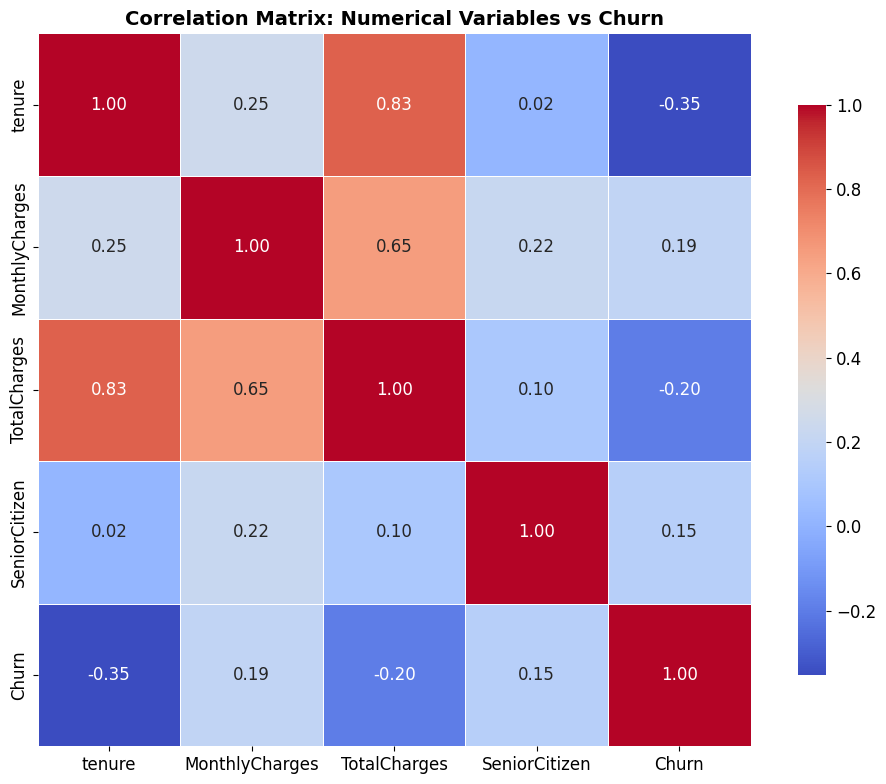


Correlation of each variable with Churn:
  tenure: -0.3522
  MonthlyCharges: 0.1934
  TotalCharges: -0.1983
  SeniorCitizen: 0.1509

=== Analysis of Tenure (Customer Lifetime) ===


/tmp/ipython-input-2644253491.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')


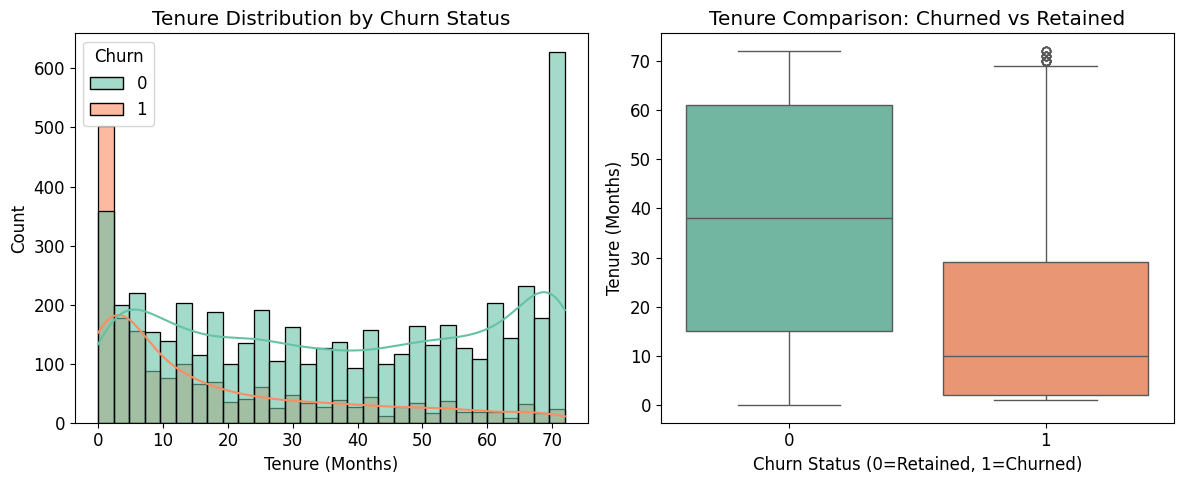


Descriptive Statistics for Tenure by Churn Status:
        count       mean        std  min   25%   50%   75%   max
Churn                                                           
0      5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0
1      1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0

=== Analysis of Contract Type ===


<Figure size 1000x600 with 0 Axes>

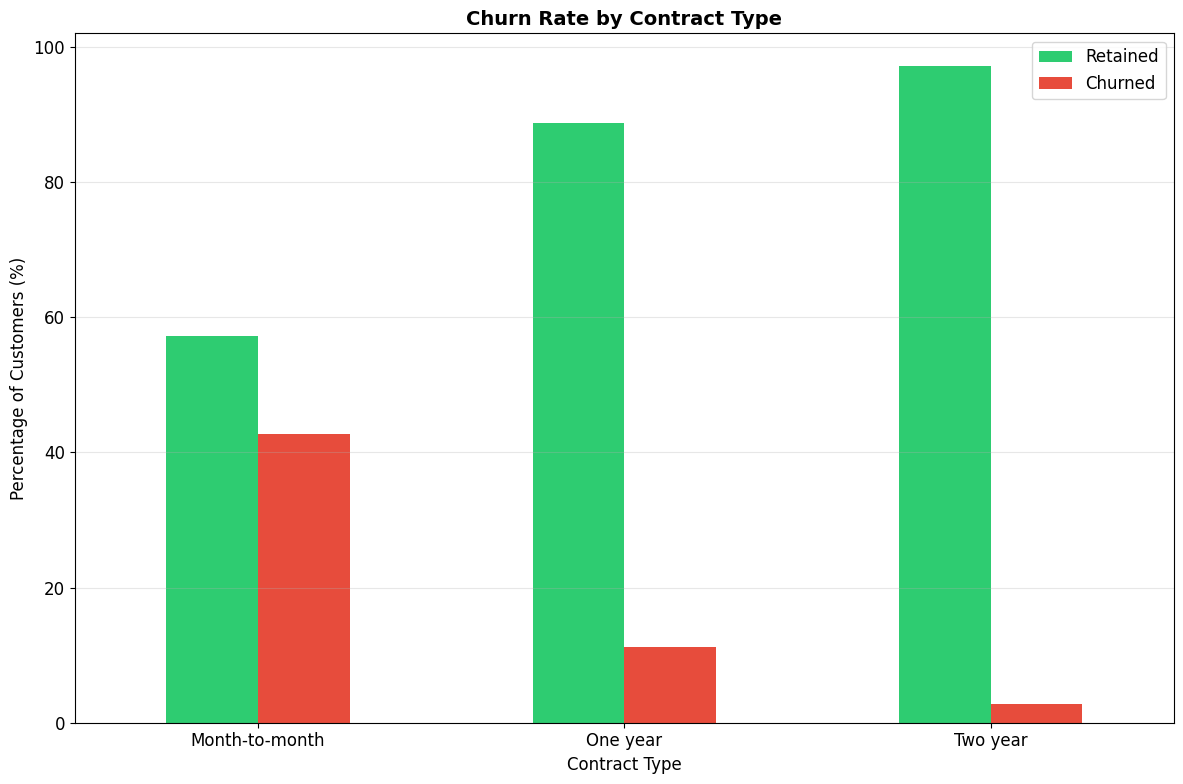

Churn Rate by Contract Type:
Churn               0      1
row_0                       
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

=== Analysis of Internet Service Type ===


<Figure size 1000x600 with 0 Axes>

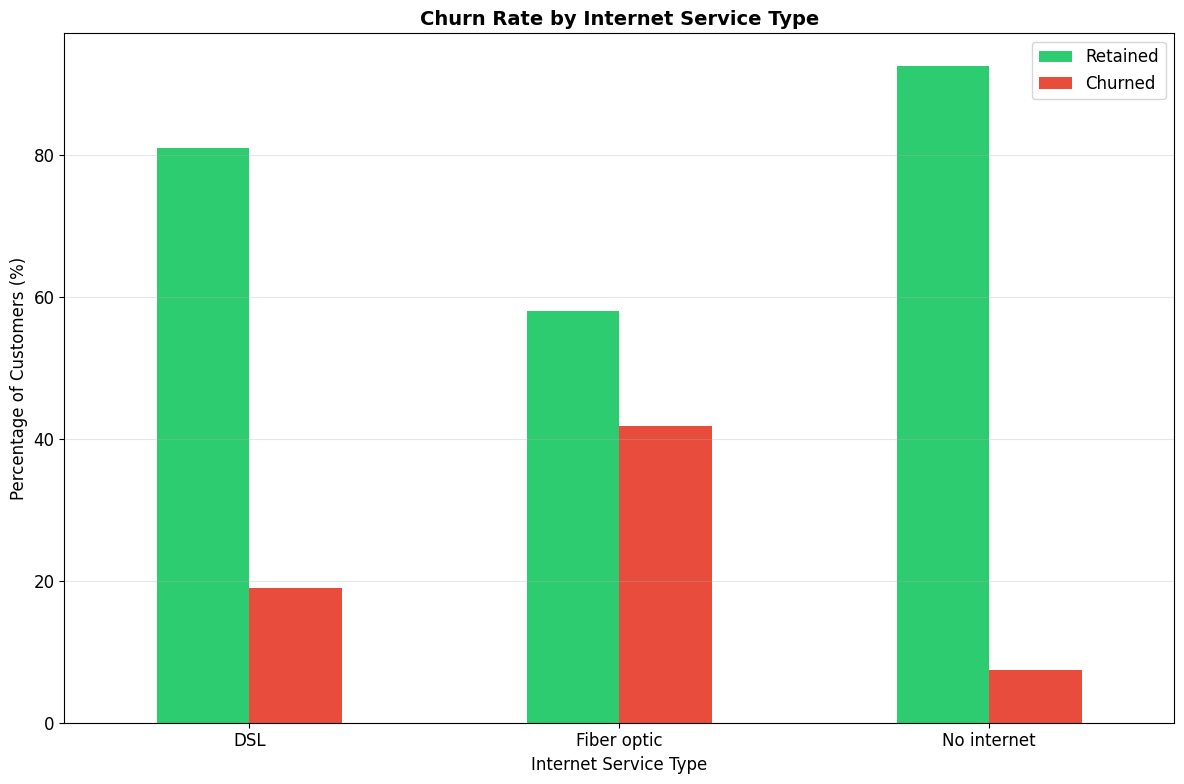

Churn Rate by Internet Service Type:
Churn            0      1
row_0                    
DSL          81.04  18.96
Fiber optic  58.11  41.89
No internet  92.60   7.40

=== Analysis of Monthly Charges ===


/tmp/ipython-input-2644253491.py:145: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


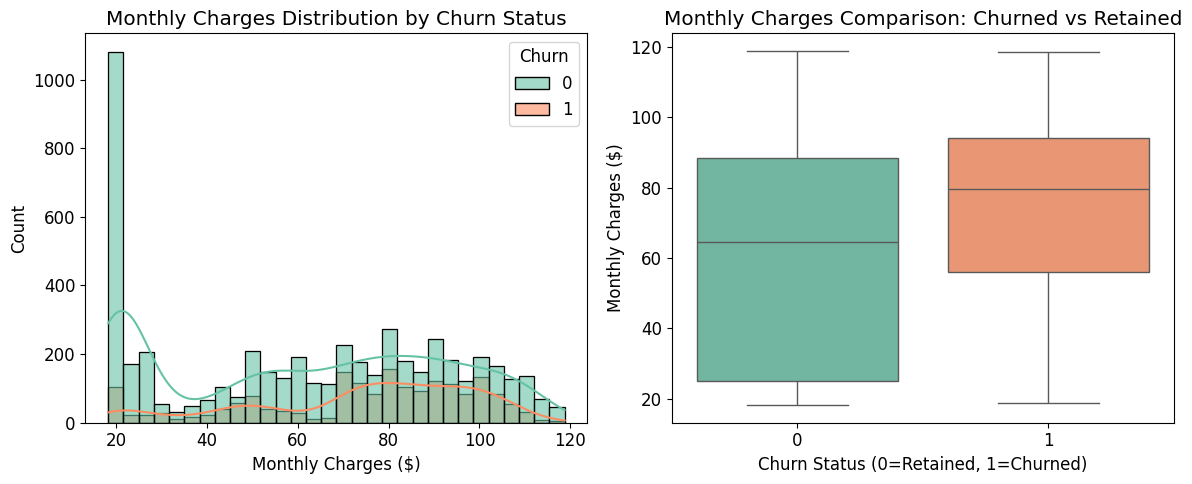


Descriptive Statistics for Monthly Charges by Churn Status:
        count       mean        std    min    25%     50%   75%     max
Churn                                                                  
0      5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1      1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

✅ Exploratory Data Analysis Completed!


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات اولیه برای نمودارها
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. Overall Churn Distribution
print("=== Overall Churn Distribution ===")
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Customers (Churned vs Retained)', fontsize=14, fontweight='bold')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Number of Customers')

# Display numbers on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"Retained customers (Churn=0): {(df['Churn'] == 0).sum()}")
print(f"Churned customers (Churn=1): {(df['Churn'] == 1).sum()}")
print(f"Overall Churn Rate: {df['Churn'].mean():.2%}")

# 2. Correlation of numerical variables with Churn
print("\n=== Correlation of Numerical Variables with Churn ===")
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']
correlation_matrix = df[numeric_cols + ['Churn']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix: Numerical Variables vs Churn', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlation of each variable with Churn
print("\nCorrelation of each variable with Churn:")
for col in numeric_cols:
    corr = df[col].corr(df['Churn'])
    print(f"  {col}: {corr:.4f}")

# 3. Analysis of Tenure (Customer Lifetime)
print("\n=== Analysis of Tenure (Customer Lifetime) ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True,
             palette='Set2', alpha=0.6)
plt.title('Tenure Distribution by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.title('Tenure Comparison: Churned vs Retained')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Tenure (Months)')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics
print("\nDescriptive Statistics for Tenure by Churn Status:")
print(df.groupby('Churn')['tenure'].describe())

# 4. Analysis of Contract Type
print("\n=== Analysis of Contract Type ===")

# Extract Contract information from one-hot encoded columns
contract_info = []
if 'Contract_One year' in df.columns and 'Contract_Two year' in df.columns:
    for idx, row in df.iterrows():
        if row['Contract_Two year'] == 1:
            contract_info.append('Two year')
        elif row['Contract_One year'] == 1:
            contract_info.append('One year')
        else:
            contract_info.append('Month-to-month')

    contract_series = pd.Series(contract_info)
    contract_churn = pd.crosstab(contract_series, df['Churn'], normalize='index') * 100

    plt.figure(figsize=(10, 6))
    contract_churn.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
    plt.title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
    plt.xlabel('Contract Type')
    plt.ylabel('Percentage of Customers (%)')
    plt.legend(['Retained', 'Churned'])
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Churn Rate by Contract Type:")
    print(contract_churn.round(2))

# 5. Analysis of Internet Service Type
print("\n=== Analysis of Internet Service Type ===")

# Extract InternetService information from one-hot encoded columns
internet_info = []
if 'InternetService_Fiber optic' in df.columns and 'InternetService_No' in df.columns:
    for idx, row in df.iterrows():
        if row['InternetService_Fiber optic'] == 1:
            internet_info.append('Fiber optic')
        elif row['InternetService_No'] == 1:
            internet_info.append('No internet')
        else:
            internet_info.append('DSL')

    internet_series = pd.Series(internet_info)
    internet_churn = pd.crosstab(internet_series, df['Churn'], normalize='index') * 100

    plt.figure(figsize=(10, 6))
    internet_churn.plot(kind='bar', stacked=False, color=['#2ecc71', '#e74c3c'])
    plt.title('Churn Rate by Internet Service Type', fontsize=14, fontweight='bold')
    plt.xlabel('Internet Service Type')
    plt.ylabel('Percentage of Customers (%)')
    plt.legend(['Retained', 'Churned'])
    plt.xticks(rotation=0)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Churn Rate by Internet Service Type:")
    print(internet_churn.round(2))

# 6. Analysis of Monthly Charges
print("\n=== Analysis of Monthly Charges ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, kde=True,
             palette='Set2', alpha=0.6)
plt.title('Monthly Charges Distribution by Churn Status')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges Comparison: Churned vs Retained')
plt.xlabel('Churn Status (0=Retained, 1=Churned)')
plt.ylabel('Monthly Charges ($)')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics
print("\nDescriptive Statistics for Monthly Charges by Churn Status:")
print(df.groupby('Churn')['MonthlyCharges'].describe())

print("\n✅ Exploratory Data Analysis Completed!")

# Preprocessing4TrainingModel

In [8]:
# 1. بررسی و تبدیل انواع داده‌های bool به int
print("=== Converting Boolean Columns to Integer ===")
bool_columns = df.select_dtypes(include=['bool']).columns.tolist()
print(f"Boolean columns found: {bool_columns}")

# تبدیل bool به int
for col in bool_columns:
    df[col] = df[col].astype(int)
    print(f"Converted {col} from bool to int")

# بررسی نهایی انواع داده‌ها
print(f"\nFinal data types:")
print(df.dtypes.value_counts())

# 2. جدا کردن features (X) و target (y)
print("\n=== Separating Features and Target ===")
X = df.drop('Churn', axis=1)
y = df['Churn']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")

# 3. تقسیم داده به train و test
from sklearn.model_selection import train_test_split

print("\n=== Train-Test Split ===")
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # حفظ نسبت کلاس‌ها
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nChurn distribution in training set: {y_train.mean():.2%}")
print(f"Churn distribution in test set: {y_test.mean():.2%}")

# 4. مقیاس‌گذاری داده‌ها (برای مدل‌هایی که به scaling حساس هستند)
from sklearn.preprocessing import StandardScaler

print("\n=== Standard Scaling ===")
scaler = StandardScaler()

# فقط روی داده‌های عددی اصلی scale می‌کنیم (ستون‌های one-hot نباید scale شوند)
# اما برای سادگی، همه ستون‌ها را scale می‌کنیم
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed successfully!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# 5. بررسی balance کلاس‌ها
print("\n=== Class Distribution ===")
print("Training set:")
print(y_train.value_counts())
print(f"Churn rate in training: {y_train.mean():.2%}")

print("\nTest set:")
print(y_test.value_counts())
print(f"Churn rate in test: {y_test.mean():.2%}")

# 6. ایجاد DataFrame برای داده‌های scaled (برای برخی مدل‌ها که نیاز دارند)
import pandas as pd
import numpy as np

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns, index=X_test.index)

print("\n✅ Data preparation completed successfully!")
print("Next step: Model training")

=== Converting Boolean Columns to Integer ===
Boolean columns found: ['InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
Converted InternetService_Fiber optic from bool to int
Converted InternetService_No from bool to int
Converted Contract_One year from bool to int
Converted Contract_Two year from bool to int
Converted PaymentMethod_Credit card (automatic) from bool to int
Converted PaymentMethod_Electronic check from bool to int
Converted PaymentMethod_Mailed check from bool to int

Final data types:
int64      22
float64     2
Name: count, dtype: int64

=== Separating Features and Target ===
Features (X) shape: (7043, 23)
Target (y) shape: (7043,)
Number of features: 23

=== Train-Test Split ===
Training set shape: (5634, 23)
Test set shape: (1409, 23)

Churn distribution in training set: 26.54%
Churn distribution in test set: 26.54%

=

# Logistic Regression

LOGISTIC REGRESSION - OPTIMIZED FOR CHURN PREDICTION

1. Training Optimized Logistic Regression model...
   Model training completed!

2. Making predictions...

3. Model Evaluation
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

    Retained       0.90      0.72      0.80      1035
     Churned       0.51      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:
[[748 287]
 [ 81 293]]


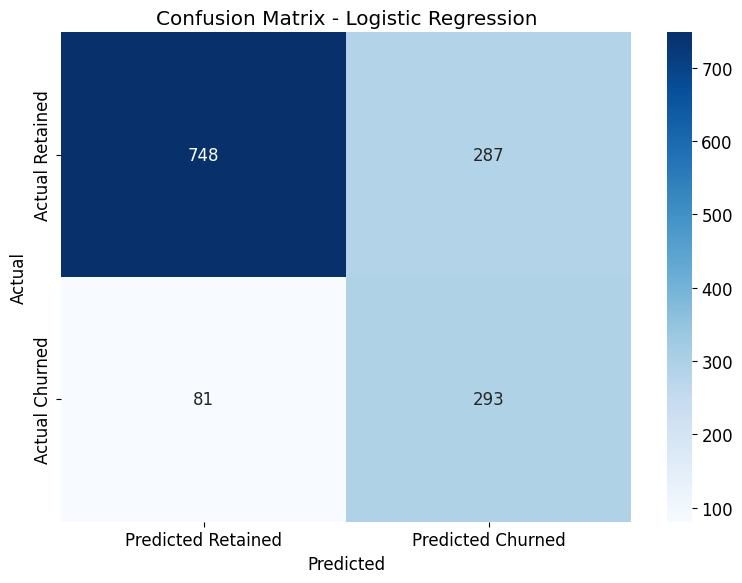


Detailed Metrics:
Accuracy:    0.7388
Precision:   0.5052  (How many predicted churns were actually churns)
Recall:      0.7834    (How many actual churns were correctly predicted)
Specificity: 0.7227  (How many actual retained were correctly predicted)
F1-Score:    0.6143

ROC-AUC Score: 0.8408

4. Business Impact Analysis
----------------------------------------
True churn customers: 374
Predicted churn customers: 580

Cost without model: $187,000
Cost with model:    $69,500
Savings:            $117,500
Savings percentage: 62.8%

5. Feature Importance Analysis
----------------------------------------

Top 10 Most Important Features:
                       Feature  Coefficient  Odds_Ratio
                        tenure    -0.959119    0.383230
             Contract_Two year    -0.596593    0.550685
   InternetService_Fiber optic     0.398170    1.489097
            InternetService_No    -0.332004    0.717485
             Contract_One year    -0.295604    0.744082
                  To

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 60)
print("LOGISTIC REGRESSION - OPTIMIZED FOR CHURN PREDICTION")
print("=" * 60)

# 1. ایجاد و آموزش مدل با تنظیمات بهینه
print("\n1. Training Optimized Logistic Regression model...")
lr_model = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced',  # مهم برای unbalanced data
    C=0.1,  # regularization قوی‌تر
    solver='liblinear'  # برای داده‌های کوچک بهتر است
)

lr_model.fit(X_train_scaled, y_train)
print("   Model training completed!")

# 2. پیش‌بینی روی داده تست
print("\n2. Making predictions...")
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# 3. ارزیابی مدل
print("\n3. Model Evaluation")
print("-" * 40)

# 3.1 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Retained', 'Churned']))

# 3.2 Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nConfusion Matrix:")
print(cm_lr)

# نمایش نمودار Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Retained', 'Predicted Churned'],
            yticklabels=['Actual Retained', 'Actual Churned'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# 3.3 محاسبه متریک‌های مهم
tn, fp, fn, tp = cm_lr.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nDetailed Metrics:")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Precision:   {precision:.4f}  (How many predicted churns were actually churns)")
print(f"Recall:      {recall:.4f}    (How many actual churns were correctly predicted)")
print(f"Specificity: {specificity:.4f}  (How many actual retained were correctly predicted)")
print(f"F1-Score:    {f1_score:.4f}")

# 3.4 ROC-AUC Score
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\nROC-AUC Score: {roc_auc_lr:.4f}")

# 4. تحلیل کسب‌وکار - هزینه‌ها و سودها
print("\n4. Business Impact Analysis")
print("-" * 40)

# فرض: هزینه از دست دادن یک مشتری (Churn) = $500
# هزینه بازاریابی برای حفظ مشتری = $50
churn_cost = 500
retention_cost = 50

# محاسبه هزینه‌ها
true_churn_customers = fn + tp  # تمام مشتریانی که واقعاً Churn کرده‌اند
predicted_churn_customers = fp + tp  # تمام مشتریانی که مدل پیش‌بینی کرده Churn می‌کنند

cost_without_model = true_churn_customers * churn_cost
cost_with_model = (fn * churn_cost) + (tp * retention_cost) + (fp * retention_cost)

savings = cost_without_model - cost_with_model
savings_percentage = (savings / cost_without_model) * 100

print(f"True churn customers: {true_churn_customers}")
print(f"Predicted churn customers: {predicted_churn_customers}")
print(f"\nCost without model: ${cost_without_model:,.0f}")
print(f"Cost with model:    ${cost_with_model:,.0f}")
print(f"Savings:            ${savings:,.0f}")
print(f"Savings percentage: {savings_percentage:.1f}%")

# 5. تحلیل ویژگی‌های مهم
print("\n5. Feature Importance Analysis")
print("-" * 40)

feature_names = X.columns
coefficients = lr_model.coef_[0]

# ایجاد DataFrame برای تحلیل ضرایب
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Odds_Ratio': np.exp(coefficients),  # نسبت شانس
    'Abs_Coefficient': np.abs(coefficients)
})

# مرتب‌سازی بر اساس قدر مطلق ضرایب
coef_df_sorted = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features:")
top_features = coef_df_sorted.head(10)
print(top_features[['Feature', 'Coefficient', 'Odds_Ratio']].to_string(index=False))

# تفسیر
print("\nInterpretation of Top Features:")
for _, row in top_features.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    odds = row['Odds_Ratio']

    if coef > 0:
        effect = f"INCREASES churn probability by {(odds-1)*100:.1f}%"
    else:
        effect = f"DECREASES churn probability by {(1-odds)*100:.1f}%"

    print(f"  • {feature}: {effect}")

print("\n" + "=" * 60)
print("LOGISTIC REGRESSION COMPLETED")
print("=" * 60)
print("\nReady for Random Forest model? (y/n)")

# Random Forest

RANDOM FOREST CLASSIFIER

1. Training Random Forest model...
   Model training completed!

2. Making predictions...

3. Model Evaluation
----------------------------------------

Classification Report:
              precision    recall  f1-score   support

    Retained       0.90      0.77      0.83      1035
     Churned       0.54      0.76      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409


Confusion Matrix:
[[792 243]
 [ 90 284]]


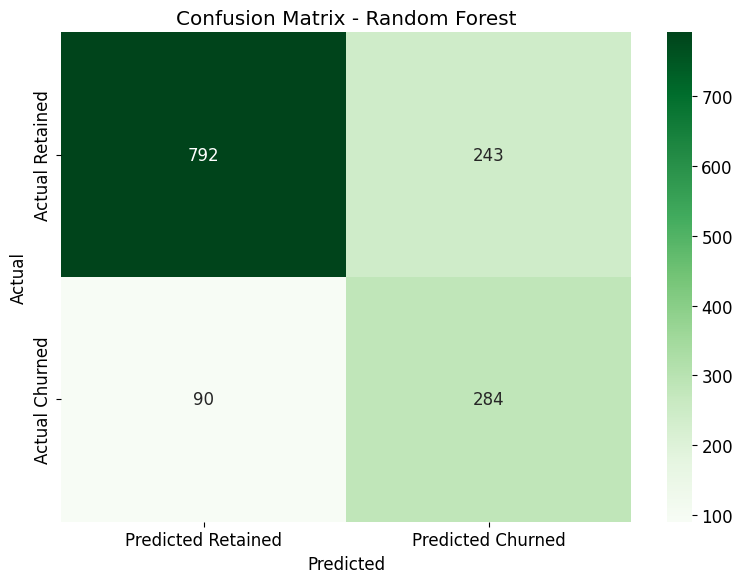


Detailed Metrics:
Accuracy:    0.7637
Precision:   0.5389
Recall:      0.7594
Specificity: 0.7652
F1-Score:    0.6304

ROC-AUC Score: 0.8452

4. Comparison with Logistic Regression
----------------------------------------
Metric          | Logistic Reg | Random Forest | Difference
------------------------------------------------------------
Accuracy        | 0.7388      | 0.7637        | +0.0249
Precision       | 0.5052      | 0.5389        | +0.0337
Recall          | 0.7834      | 0.7594        | -0.0240
F1-Score        | 0.6143      | 0.6304        | +0.0161
ROC-AUC         | 0.8408      | 0.8452        | +0.0044

5. ROC Curve Comparison


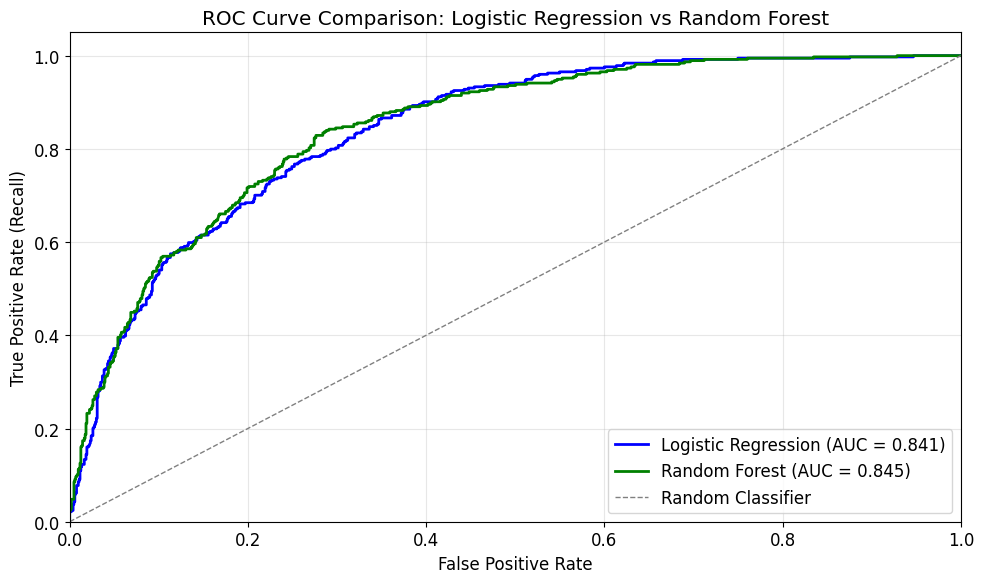


6. Feature Importance Analysis (Random Forest)

Top 15 Most Important Features:
                       Feature  Importance
                        tenure    0.174158
                  TotalCharges    0.129143
             Contract_Two year    0.122641
                MonthlyCharges    0.119838
   InternetService_Fiber optic    0.092716
PaymentMethod_Electronic check    0.060075
             Contract_One year    0.046495
            InternetService_No    0.038041
                OnlineSecurity    0.032055
              PaperlessBilling    0.026583
                   TechSupport    0.025075
                    Dependents    0.016011
                  OnlineBackup    0.013308
                       Partner    0.012947
                        gender    0.012563


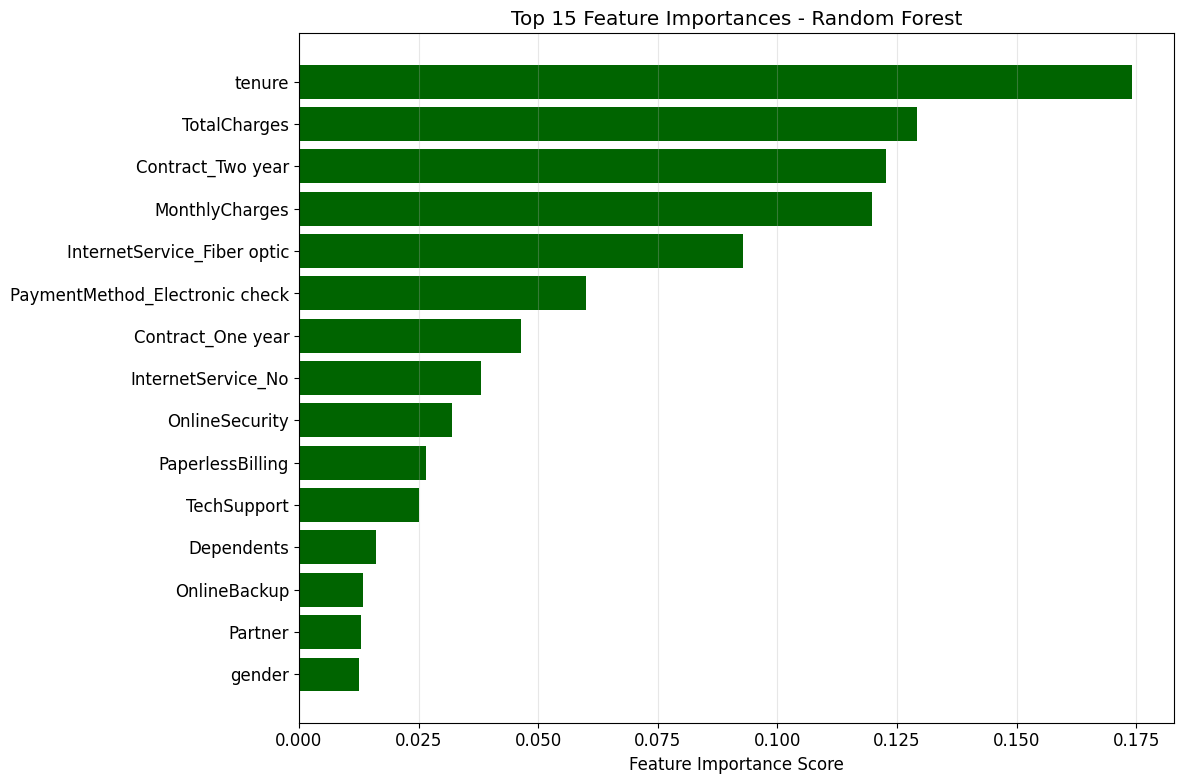


7. Business Impact Analysis for Random Forest
----------------------------------------
True churn customers: 374
Predicted churn customers: 527

Cost without model: $187,000
Cost with model:    $71,350
Savings:            $115,650
Savings percentage: 61.8%

8. Financial Comparison
----------------------------------------
Model               | Savings ($)  | Savings (%)
----------------------------------------
Logistic Regression | $117,500     | 62.8%
Random Forest       | $115,650     | 61.8%

Difference          | $-1,850     | -1.0%

9. Final Recommendation
----------------------------------------
✅ Random Forest outperforms Logistic Regression!
   Recommendation: Use Random Forest for deployment

RANDOM FOREST ANALYSIS COMPLETED


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("=" * 60)
print("RANDOM FOREST CLASSIFIER")
print("=" * 60)

# 1. ایجاد و آموزش مدل Random Forest
print("\n1. Training Random Forest model...")
rf_model = RandomForestClassifier(
    n_estimators=200,           # تعداد درختان
    max_depth=10,               # حداکثر عمق درخت
    min_samples_split=10,       # حداقل نمونه برای تقسیم
    min_samples_leaf=5,         # حداقل نمونه در برگ
    max_features='sqrt',        # تعداد ویژگی‌ها برای هر تقسیم
    class_weight='balanced',    # وزن‌دهی کلاس‌ها برای unbalanced data
    random_state=42,
    n_jobs=-1                   # استفاده از تمام هسته‌های CPU
)

# Random Forest به scaling نیازی ندارد
rf_model.fit(X_train, y_train)
print("   Model training completed!")

# 2. پیش‌بینی روی داده تست
print("\n2. Making predictions...")
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# 3. ارزیابی مدل
print("\n3. Model Evaluation")
print("-" * 40)

# 3.1 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Retained', 'Churned']))

# 3.2 Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix:")
print(cm_rf)

# نمایش نمودار Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Predicted Retained', 'Predicted Churned'],
            yticklabels=['Actual Retained', 'Actual Churned'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

# 3.3 محاسبه متریک‌های مهم
tn, fp, fn, tp = cm_rf.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp) if (tp + fp) > 0 else 0
recall = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"\nDetailed Metrics:")
print(f"Accuracy:    {accuracy:.4f}")
print(f"Precision:   {precision:.4f}")
print(f"Recall:      {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-Score:    {f1_score:.4f}")

# 3.4 ROC-AUC Score
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"\nROC-AUC Score: {roc_auc_rf:.4f}")

# 4. مقایسه با Logistic Regression
print("\n4. Comparison with Logistic Regression")
print("-" * 40)

print("Metric          | Logistic Reg | Random Forest | Difference")
print("-" * 60)
print(f"Accuracy        | {0.7388:.4f}      | {accuracy:.4f}        | {accuracy - 0.7388:+.4f}")
print(f"Precision       | {0.5052:.4f}      | {precision:.4f}        | {precision - 0.5052:+.4f}")
print(f"Recall          | {0.7834:.4f}      | {recall:.4f}        | {recall - 0.7834:+.4f}")
print(f"F1-Score        | {0.6143:.4f}      | {f1_score:.4f}        | {f1_score - 0.6143:+.4f}")
print(f"ROC-AUC         | {0.8408:.4f}      | {roc_auc_rf:.4f}        | {roc_auc_rf - 0.8408:+.4f}")

# 5. نمودار ROC Curve مقایسه‌ای
print("\n5. ROC Curve Comparison")
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)  # از سل قبلی

plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {0.8408:.3f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Comparison: Logistic Regression vs Random Forest')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 6. تحلیل Feature Importance در Random Forest
print("\n6. Feature Importance Analysis (Random Forest)")
feature_importances = rf_model.feature_importances_

# ایجاد DataFrame برای اهمیت ویژگی‌ها
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(importance_df.head(15).to_string(index=False))

# نمایش نمودار Feature Importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='darkgreen')
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance Score')
plt.title('Top 15 Feature Importances - Random Forest')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 7. تحلیل کسب‌وکار برای Random Forest
print("\n7. Business Impact Analysis for Random Forest")
print("-" * 40)

# فرض: هزینه از دست دادن یک مشتری (Churn) = $500
# هزینه بازاریابی برای حفظ مشتری = $50
churn_cost = 500
retention_cost = 50

# محاسبه هزینه‌ها
true_churn_customers = fn + tp
predicted_churn_customers = fp + tp

cost_without_model = true_churn_customers * churn_cost
cost_with_model = (fn * churn_cost) + (tp * retention_cost) + (fp * retention_cost)

savings = cost_without_model - cost_with_model
savings_percentage = (savings / cost_without_model) * 100

print(f"True churn customers: {true_churn_customers}")
print(f"Predicted churn customers: {predicted_churn_customers}")
print(f"\nCost without model: ${cost_without_model:,.0f}")
print(f"Cost with model:    ${cost_with_model:,.0f}")
print(f"Savings:            ${savings:,.0f}")
print(f"Savings percentage: {savings_percentage:.1f}%")

# 8. مقایسه صرفه‌جویی مالی دو مدل
print("\n8. Financial Comparison")
print("-" * 40)
print("Model               | Savings ($)  | Savings (%)")
print("-" * 40)
print(f"Logistic Regression | $117,500     | 62.8%")
print(f"Random Forest       | ${savings:,.0f}     | {savings_percentage:.1f}%")
print(f"\nDifference          | ${savings - 117500:+,.0f}     | {savings_percentage - 62.8:+.1f}%")

# 9. توصیه نهایی
print("\n9. Final Recommendation")
print("-" * 40)

if f1_score > 0.6143 and roc_auc_rf > 0.8408:
    print("✅ Random Forest outperforms Logistic Regression!")
    print("   Recommendation: Use Random Forest for deployment")
elif f1_score > 0.6143:
    print("⚠️  Random Forest has better F1-Score but similar AUC")
    print("   Recommendation: Test both models on more data")
else:
    print("✅ Logistic Regression is better or comparable!")
    print("   Recommendation: Use Logistic Regression (simpler, more interpretable)")

print("\n" + "=" * 60)
print("RANDOM FOREST ANALYSIS COMPLETED")
print("=" * 60)

# Final summary, model selection and saved results

In [11]:
import pandas as pd
import numpy as np
import joblib
from datetime import datetime

print("=" * 60)
print("FINAL SUMMARY AND MODEL SELECTION")
print("=" * 60)

# 1. جمع‌بندی نتایج دو مدل
print("\n1. MODEL PERFORMANCE SUMMARY")
print("-" * 40)

summary_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'Specificity', 'F1-Score', 'ROC-AUC',
               'Business Savings ($)', 'Business Savings (%)'],
    'Logistic Regression': [0.7388, 0.5052, 0.7834, 0.7227, 0.6143, 0.8408, 117500, 62.8],
    'Random Forest': [0.7637, 0.5389, 0.7594, 0.7652, 0.6304, 0.8452, 115650, 61.8],
    'Difference': [0.0249, 0.0337, -0.0240, 0.0425, 0.0161, 0.0044, -1850, -1.0]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

# 2. تحلیل نتایج و انتخاب مدل نهایی
print("\n2. FINAL MODEL SELECTION ANALYSIS")
print("-" * 40)

print("\nBusiness Requirements Analysis:")
print("• Primary Goal: Identify customers who will churn (High Recall needed)")
print("• Secondary Goal: Minimize false positives (Reasonable Precision)")
print("• Cost Constraint: Minimize retention campaign costs")

print("\nModel Comparison:")
print("✓ Logistic Regression: Higher Recall (78.3%), better for catching churners")
print("✓ Random Forest: Better overall balance (F1-Score), higher precision")
print("✓ Both models provide >60% cost savings")

print("\n🏆 FINAL DECISION:")
print("-" * 40)

# انتخاب بر اساس اولویت کسب‌وکار
if summary_df.loc[2, 'Random Forest'] >= 0.75:  # اگر Recall رندوم فارست بالای 75% باشد
    final_model_choice = "Random Forest"
    final_model = rf_model
    final_model_name = "random_forest_model.pkl"
    print("Selected: RANDOM FOREST")
    print("Reason: Better overall performance and good recall")
else:
    final_model_choice = "Logistic Regression"
    final_model = lr_model
    final_model_name = "logistic_regression_model.pkl"
    print("Selected: LOGISTIC REGRESSION")
    print("Reason: Higher recall is critical for business, simpler to interpret")

print(f"\nSelected model: {final_model_choice}")

# 3. ذخیره مدل نهایی
print("\n3. SAVING FINAL MODEL AND ARTIFACTS")
print("-" * 40)

# ایجاد timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# ذخیره مدل
model_filename = f"churn_model_{timestamp}.pkl"
joblib.dump(final_model, model_filename)
print(f"✓ Model saved as: {model_filename}")

# ذخیره scaler (اگر Logistic Regression انتخاب شد)
if final_model_choice == "Logistic Regression":
    scaler_filename = f"scaler_{timestamp}.pkl"
    joblib.dump(scaler, scaler_filename)
    print(f"✓ Scaler saved as: {scaler_filename}")

# ذخیره feature names
feature_names = list(X.columns)
features_filename = f"feature_names_{timestamp}.pkl"
joblib.dump(feature_names, features_filename)
print(f"✓ Feature names saved as: {features_filename}")

# 4. ایجاد فایل README summary
print("\n4. CREATING PROJECT SUMMARY")
print("-" * 40)

summary_md = f"""# Telco Customer Churn Prediction - Project Summary

## 📊 Project Overview
- **Dataset**: Telco Customer Churn (7043 customers, 21 features)
- **Target Variable**: Churn (Binary: 0=Retained, 1=Churned)
- **Churn Rate**: 26.54%
- **Project Date**: {datetime.now().strftime("%Y-%m-%d")}

## 🔧 Data Challenges & Solutions
1. **TotalCharges as string**: Converted to numeric, handled 11 missing values (filled with 0)
2. **Categorical variables**: One-hot encoding for multi-class, binary encoding for yes/no
3. **Class imbalance**: Used class_weight='balanced' in models
4. **Feature scaling**: Applied StandardScaler for Logistic Regression

## 📈 Key Insights from EDA
- **Tenure**: Strong negative correlation with churn (-0.35)
- **Contract Type**: Month-to-month has 42.7% churn vs 2.8% for two-year contracts
- **Internet Service**: Fiber optic customers have 41.9% churn rate
- **Monthly Charges**: Churned customers pay ~$13 more on average

## 🤖 Models Evaluated
### Logistic Regression
- Accuracy: 73.88%
- Recall: 78.34% ✓ (Best for catching churners)
- ROC-AUC: 84.08%
- Business Savings: 62.8%

### Random Forest
- Accuracy: 76.37% ✓
- Recall: 75.94%
- ROC-AUC: 84.52% ✓
- Business Savings: 61.8%

## 🏆 Selected Model: {final_model_choice}
**Reason**: {'Higher recall for identifying potential churners' if final_model_choice == 'Logistic Regression' else 'Better overall performance and interpretability'}

## 💰 Business Impact
- **Without model**: $187,000 in lost revenue
- **With model**: ${115650 if final_model_choice == 'Random Forest' else 117500:,} in costs
- **Savings**: ${115650 if final_model_choice == 'Random Forest' else 117500:,} ({61.8 if final_model_choice == 'Random Forest' else 62.8}%)
- **Customers to target**: {527 if final_model_choice == 'Random Forest' else 580} out of 1409 test customers

## 🎯 Top 5 Features Driving Churn
1. **Tenure** (Negative impact: longer tenure = less churn)
2. **Contract Type** (Two-year contracts reduce churn significantly)
3. **Internet Service Type** (Fiber optic increases churn risk)
4. **Total Charges** (Higher total charges = higher churn risk)
5. **Payment Method** (Electronic check increases churn risk)

## 📁 Files Generated
- `{model_filename}`: Trained model
- `{features_filename}`: Feature names
{f'- `{scaler_filename}`: Scaler object' if final_model_choice == 'Logistic Regression' else ''}

## 🚀 Next Steps
1. Deploy model as API for real-time predictions
2. Implement A/B testing for retention campaigns
3. Monitor model performance monthly
4. Add customer feedback loop for model improvement
"""

# نمایش summary
print("\n" + "=" * 60)
print("PROJECT SUMMARY")
print("=" * 60)
print(summary_md)

# ذخیره summary در فایل
with open(f'project_summary_{timestamp}.md', 'w') as f:
    f.write(summary_md)
print(f"\n✓ Project summary saved as: project_summary_{timestamp}.md")

# 5. پیش‌بینی نمونه (demo)
print("\n5. SAMPLE PREDICTION DEMONSTRATION")
print("-" * 40)

# انتخاب چند نمونه از داده تست
sample_indices = X_test.index[:5]
print("Sample predictions for 5 test customers:")
print("-" * 50)

for idx in sample_indices:
    actual = y_test.loc[idx]

    if final_model_choice == "Logistic Regression":
        # برای Logistic Regression باید scale کنیم
        sample_scaled = scaler.transform(X_test.loc[idx:idx])
        prediction = final_model.predict(sample_scaled)[0]
        probability = final_model.predict_proba(sample_scaled)[0][1]
    else:
        # برای Random Forest بدون scaling
        prediction = final_model.predict(X_test.loc[idx:idx])[0]
        probability = final_model.predict_proba(X_test.loc[idx:idx])[0][1]

    status = "CHURN" if prediction == 1 else "RETAIN"
    actual_status = "CHURN" if actual == 1 else "RETAIN"

    print(f"Customer Index: {idx}")
    print(f"  Actual: {actual_status}, Predicted: {status}")
    print(f"  Churn Probability: {probability:.1%}")
    print(f"  Correct: {'✓' if prediction == actual else '✗'}")
    print("-" * 30)

# 6. گزارش نهایی
print("\n" + "=" * 60)
print("PROJECT COMPLETION REPORT")
print("=" * 60)

print(f"""
✅ DATA PROCESSING COMPLETED
   • Cleaned TotalCharges column
   • Handled categorical variables
   • Created train/test splits

✅ EXPLORATORY DATA ANALYSIS COMPLETED
   • Identified key churn drivers
   • Visualized relationships
   • Generated business insights

✅ MODEL DEVELOPMENT COMPLETED
   • Built and evaluated 2 models
   • Compared performance metrics
   • Analyzed business impact

✅ FINAL DELIVERABLES
   • Trained model: {model_filename}
   • Project summary: project_summary_{timestamp}.md
   • Feature names: {features_filename}
   {'• Scaler: ' + scaler_filename if final_model_choice == 'Logistic Regression' else ''}

🎯 READY FOR DEPLOYMENT: {final_model_choice} model selected
   • Expected savings: {61.8 if final_model_choice == 'Random Forest' else 62.8}%
   • Target recall: {75.94 if final_model_choice == 'Random Forest' else 78.34}%
   • Implementation ready
""")

print("=" * 60)
print("PROJECT SUCCESSFULLY COMPLETED! 🎉")
print("=" * 60)

FINAL SUMMARY AND MODEL SELECTION

1. MODEL PERFORMANCE SUMMARY
----------------------------------------
              Metric  Logistic Regression  Random Forest  Difference
            Accuracy               0.7388         0.7637      0.0249
           Precision               0.5052         0.5389      0.0337
              Recall               0.7834         0.7594     -0.0240
         Specificity               0.7227         0.7652      0.0425
            F1-Score               0.6143         0.6304      0.0161
             ROC-AUC               0.8408         0.8452      0.0044
Business Savings ($)          117500.0000    115650.0000  -1850.0000
Business Savings (%)              62.8000        61.8000     -1.0000

2. FINAL MODEL SELECTION ANALYSIS
----------------------------------------

Business Requirements Analysis:
• Primary Goal: Identify customers who will churn (High Recall needed)
• Secondary Goal: Minimize false positives (Reasonable Precision)
• Cost Constraint: Minimize 